In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'googleplaystore.csv', 'data.csv']


In [2]:
data = pd.read_csv('../input/data.csv')

In [3]:
data

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
data.corr()

Unnamed: 0        ID       Age   Overall  Potential  \
Unnamed: 0                  1.000000  0.415757 -0.454846 -0.972791  -0.633395   
ID                          0.415757  1.000000 -0.739208 -0.417025   0.047074   
Age                        -0.454846 -0.739208  1.000000  0.452350  -0.253312   
Overall                    -0.972791 -0.417025  0.452350  1.000000   0.660939   
Potential                  -0.633395  0.047074 -0.253312  0.660939   1.000000   
Special                    -0.596508 -0.231352  0.236695  0.606960   0.383727   
International Reputation   -0.413322 -0.356191  0.253765  0.499491   0.372993   
Weak Foot                  -0.204026 -0.075784  0.059867  0.212015   0.162346   
Skill Moves                -0.415672 -0.056914  0.027649  0.414463   0.354290   
Jersey Number               0.213645  0.182074 -0.241156 -0.218931  -0.010474   
Crossing                   -0.390062 -0.131994  0.130545  0.394972   0.246319   
Finishing                  -0.325529 -0.082323  0.068660  0.332515   0.243355   
HeadingAccuracy            -0.337766 -0.106815  0.147183  0.340776   0.200988   
ShortPassing               -0.492495 -0.136279  0.132894  0.502550   0.369189   
Volleys                    -0.384285 -0.159915  0.142472  0.391338   0.254906   
Dribbling                  -0.364106 -0.030340  0.010166  0.372426   0.315019   
Curve                      -0.416378 -0.169511  0.143276  0.419491   0.279944   
FKAccuracy                 -0.395433 -0.199549  0.193467  0.396892   0.230544   
LongPassing                -0.477500 -0.186764  0.181310  0.483909   0.321437   
BallControl                -0.449655 -0.100184  0.084969  0.460197   0.354396   
Acceleration               -0.185030  0.133236 -0.158667  0.196869   0.234608   
SprintSpeed                -0.198797  0.132437 -0.151682  0.210647   0.236771   
Agility                    -0.256270 -0.019897 -0.019395  0.264952   0.222310   
Reactions                  -0.832156 -0.408617  0.453124  0.850045   0.513425   
Balance                    -0.097160  0.048463 -0.089877  0.103160   0.138025   
ShotPower                  -0.440023 -0.166133  0.156947  0.441118   0.288318   
Jumping                    -0.261581 -0.169369  0.177167  0.264435   0.109151   
Stamina                    -0.358451 -0.053895  0.097793  0.365656   0.202563   
Strength                   -0.342839 -0.259756  0.332798  0.349326   0.075769   
LongShots                  -0.417853 -0.161549  0.155096  0.420795   0.266740   
Aggression                 -0.397067 -0.228329  0.265190  0.395470   0.171174   
Interceptions              -0.319162 -0.160602  0.197845  0.321326   0.154908   
Positioning                -0.351820 -0.088330  0.082443  0.356493   0.245616   
Vision                     -0.490296 -0.215170  0.187422  0.498894   0.348141   
Penalties                  -0.337899 -0.140657  0.139535  0.341429   0.224281   
Composure                  -0.716173 -0.384473  0.391023  0.727655   0.440008   
Marking                    -0.280829 -0.110198  0.142817  0.286505   0.162801   
StandingTackle             -0.248564 -0.085929  0.119745  0.252629   0.143564   
SlidingTackle              -0.220034 -0.068409  0.103089  0.222811   0.128980   
GKDiving                    0.027757 -0.105594  0.101277 -0.025937  -0.053446   
GKHandling                  0.027026 -0.111149  0.106419 -0.025062  -0.054672   
GKKicking                   0.030654 -0.106652  0.104964 -0.029372  -0.059061   
GKPositioning               0.019842 -0.118250  0.116402 -0.017674  -0.052589   
GKReflexes                  0.025610 -0.105778  0.103313 -0.023276  -0.053341   

                           Special  International Reputation  Weak Foot  \
Unnamed: 0               -0.596508                 -0.413322  -0.204026   
ID                       -0.231352                 -0.356191  -0.075784   
Age                       0.236695                  0.253765   0.059867   
Overall                   0.606960                  0.499491   0.212015   
Poten

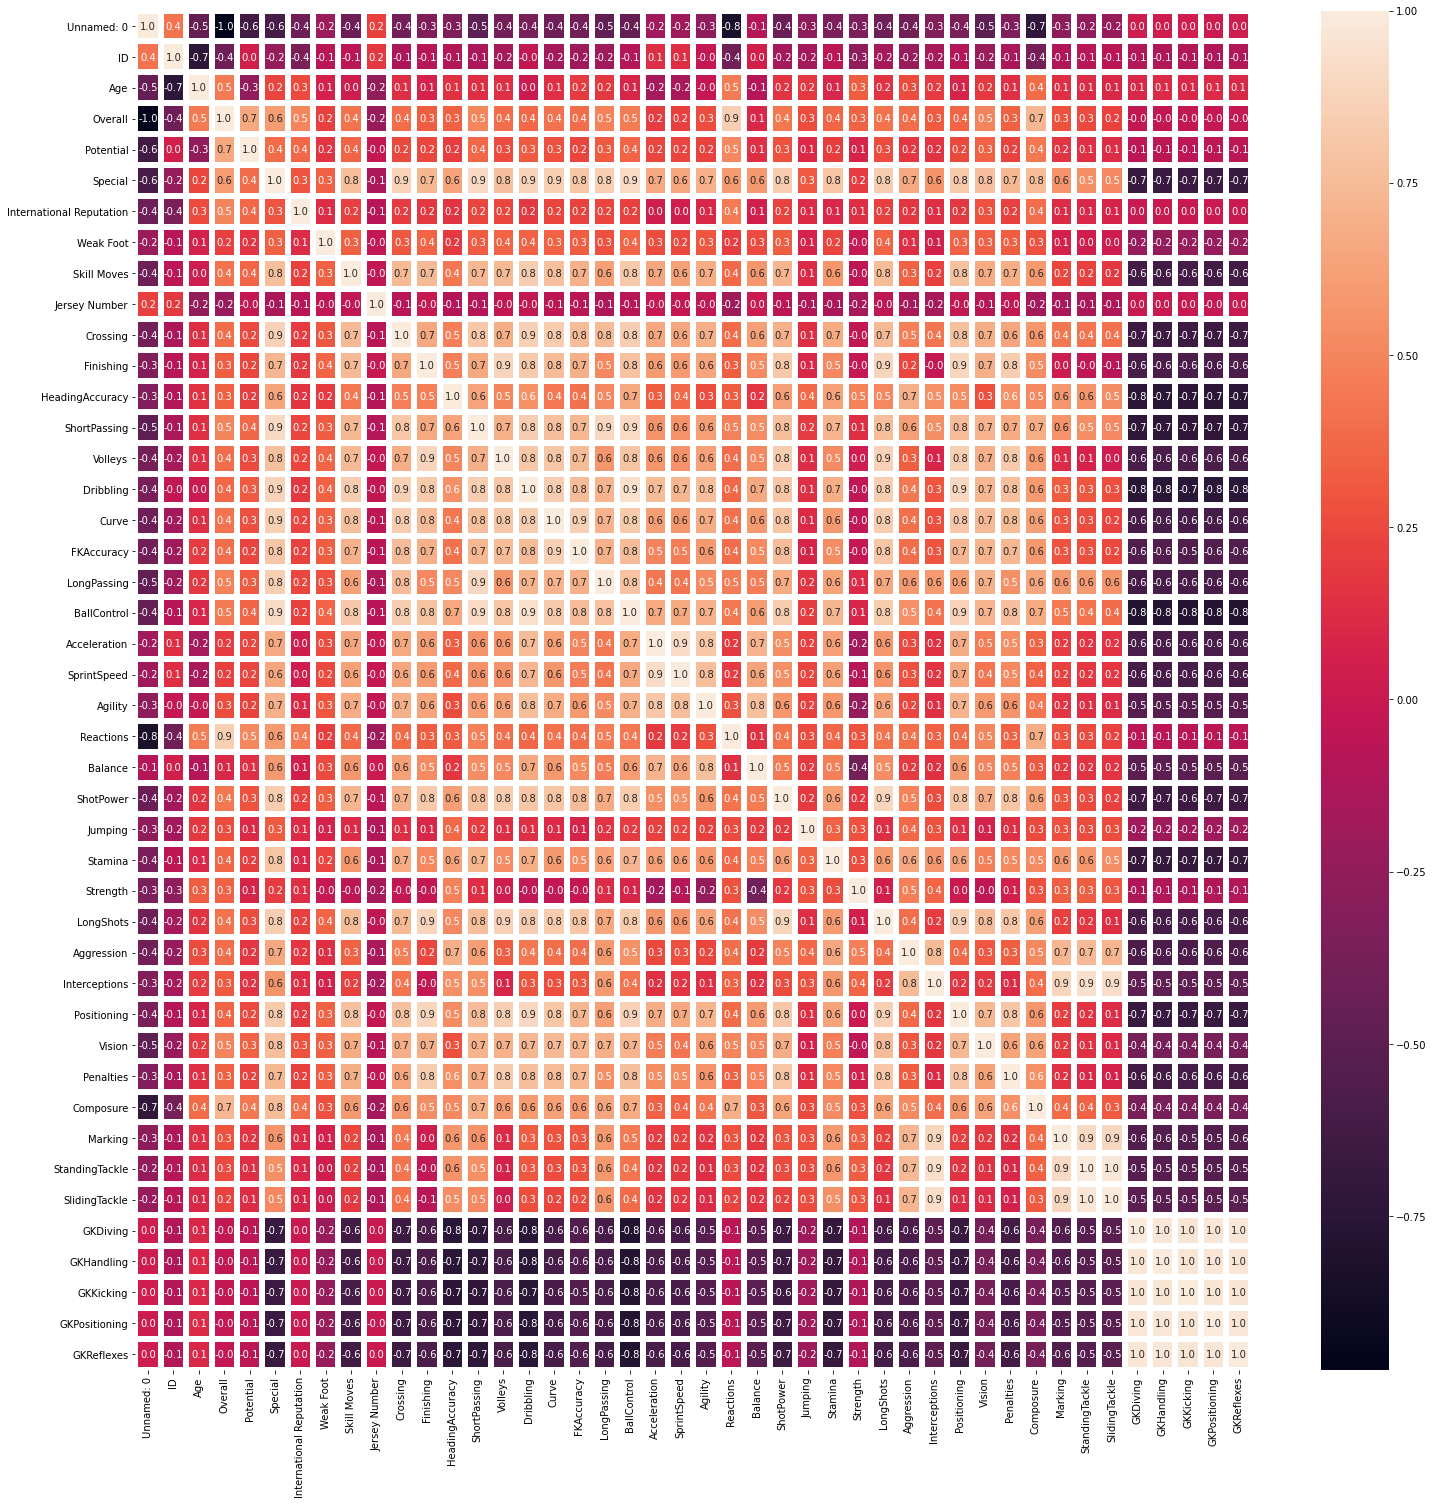

In [6]:
b,ax = plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, linewidths=5, fmt= '.1f',ax=ax)
plt.show()

In [7]:
data.head(10)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   
5           5  183277          E. Hazard   27   
6           6  177003          L. Modrić   32   
7           7  176580          L. Suárez   31   
8           8  155862       Sergio Ramos   32   
9           9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7  https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8  https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9  https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   
5   https://cdn.sofifa.org/flags/7.png       91         91   
6  https://cdn.sofifa.org/flags/10.png       91         91   
7  https://cdn.sofifa.org/flags/60.png       91         91   
8  https://cdn.sofifa.org/flags/45.png       91         91   
9  https://cdn.sofifa.org/flags/44.png       90         93   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   
5              Chelsea  ...      91.0    34.0           27.0           22.0   
6          Real Madrid  ...      84.0    60.0           76.0           73.0   
7         FC Barcelona  ...      85.0    62.0           45.0           38.0   
8          Real Madrid  ...      82.0    87.0           92.0           91.0   
9      Atlético Madrid  ...      70.0    27.0           12.0           18.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  
5     11.0        12.0        6.0            8.0        8.0        €172.1M  
6     13.0         9.0        7.0           14.0        9.0        €137.4M  
7     27.0        25.0       31.0           33.0       37.0          €164M  
8     11.0         8.0        9.0            7.0       11.0        €104.6M  
9     86.0        92.0       78.0           88.0       89.0        €144.5M  

[10 rows x 89 columns]

In [8]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

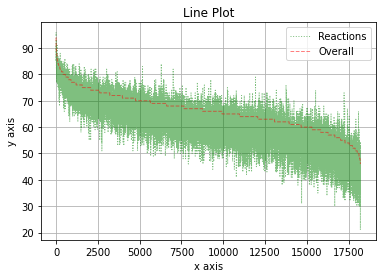

In [9]:
#Line Plot
#  color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Reactions.plot(kind = 'line', color = 'g', label = 'Reactions', linewidth = 1, alpha = 0.5,grid = True,linestyle = ':')
data.Overall.plot(color = 'r',label = 'Overall', linewidth = 1, alpha = 0.5, grid = True, linestyle = '--')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

Text(0.5, 1.0, 'Potential&Overall Scatter Plot')

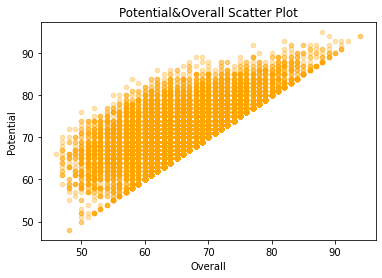

In [10]:
#Scatter Plot
#x = Dribbling , y = Strength
data.plot(kind='scatter' , x='Overall', y='Potential', alpha = 0.3,color = 'orange')
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Potential&Overall Scatter Plot')


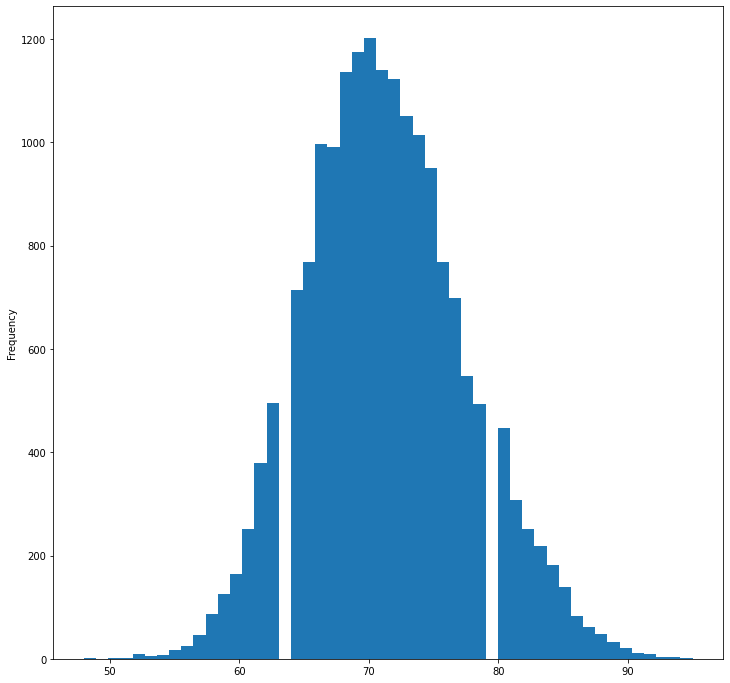

In [11]:
#Histogram 
# bins = number of bar in figure
data.Potential.plot(kind='hist',bins = 50, figsize=(12,12))
plt.show()

In [12]:
# clf() = cleans it up again you can start a fresh
data.Potential.plot(kind = 'hist',bins = 50)
plt.clf()


<Figure size 432x288 with 0 Axes>

**DICTIONARY TUTORIAL**


In [13]:
#creating dictionary nd looking its keys and values
dictionary = {'turkey' : 'ankara', 'france' : 'paris'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['turkey', 'france'])
dict_values(['ankara', 'paris'])


In [14]:
dictionary['turkey'] = "istanbul" # updating entry
print(dictionary)
dictionary['england'] = 'london' # adding new entry
print(dictionary)
#del dictionary['france'] removing entry with keyword = france
#print('france' in dictionary) checking include or not
#dictionary.clear() removing all entries


{'turkey': 'istanbul', 'france': 'paris'}
{'turkey': 'istanbul', 'france': 'paris', 'england': 'london'}


**PANDAS TUTORIAL**

Differentiate series and data frame

In [15]:
data = pd.read_csv('../input/data.csv')

In [16]:
series = data['Dribbling']
print(type(series))
data_frame = data[['Dribbling']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


**Logic&Control Flow&Filtering Tutorial 
**

In [17]:
x = data['Acceleration']>95
data[x]

Unnamed: 0      ID           Name  Age  \
25            25  231747      K. Mbappé   19   
65            65  190483  Douglas Costa   27   
1968        1968  213956          Adama   22   
5886        5886  212807      K. Manneh   23   

                                               Photo    Nationality  \
25    https://cdn.sofifa.org/players/4/19/231747.png         France   
65    https://cdn.sofifa.org/players/4/19/190483.png         Brazil   
1968  https://cdn.sofifa.org/players/4/19/213956.png          Spain   
5886  https://cdn.sofifa.org/players/4/19/212807.png  United States   

                                     Flag  Overall  Potential  \
25    https://cdn.sofifa.org/flags/18.png       88         95   
65    https://cdn.sofifa.org/flags/54.png       86         86   
1968  https://cdn.sofifa.org/flags/45.png       75         85   
5886  https://cdn.sofifa.org/flags/95.png       69         76   

                         Club  ... Composure Marking StandingTackle  \
25        Paris Saint-Germain  ...      86.0    34.0           34.0   
65                   Juventus  ...      84.0    45.0           38.0   
1968  Wolverhampton Wanderers  ...      70.0    16.0           26.0   
5886            FC St. Gallen  ...      68.0    31.0           46.0   

      SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
25             32.0     13.0         5.0        7.0           11.0        6.0   
65             34.0     13.0        15.0        9.0           12.0        5.0   
1968           23.0     13.0         9.0       11.0           12.0        7.0   
5886           29.0      9.0        11.0       14.0           10.0        9.0   

     Release Clause  
25          €166.1M  
65           €76.7M  
1968         €22.1M  
5886          €2.4M  

[4 rows x 89 columns]

In [18]:
data[np.logical_and(data['Acceleration']>94, data['Dribbling']>85 )]

Unnamed: 0      ID           Name  Age  \
25            25  231747      K. Mbappé   19   
58            58  208722        S. Mané   26   
60            60  202652    R. Sterling   23   
65            65  190483  Douglas Costa   27   
164          164  213345       K. Coman   22   
1968        1968  213956          Adama   22   

                                               Photo Nationality  \
25    https://cdn.sofifa.org/players/4/19/231747.png      France   
58    https://cdn.sofifa.org/players/4/19/208722.png     Senegal   
60    https://cdn.sofifa.org/players/4/19/202652.png     England   
65    https://cdn.sofifa.org/players/4/19/190483.png      Brazil   
164   https://cdn.sofifa.org/players/4/19/213345.png      France   
1968  https://cdn.sofifa.org/players/4/19/213956.png       Spain   

                                      Flag  Overall  Potential  \
25     https://cdn.sofifa.org/flags/18.png       88         95   
58    https://cdn.sofifa.org/flags/136.png       86         87   
60     https://cdn.sofifa.org/flags/14.png       86         89   
65     https://cdn.sofifa.org/flags/54.png       86         86   
164    https://cdn.sofifa.org/flags/18.png       83         87   
1968   https://cdn.sofifa.org/flags/45.png       75         85   

                         Club  ... Composure Marking StandingTackle  \
25        Paris Saint-Germain  ...      86.0    34.0           34.0   
58                  Liverpool  ...      80.0    42.0           42.0   
60            Manchester City  ...      77.0    47.0           58.0   
65                   Juventus  ...      84.0    45.0           38.0   
164         FC Bayern München  ...      75.0    29.0           17.0   
1968  Wolverhampton Wanderers  ...      70.0    16.0           26.0   

      SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
25             32.0     13.0         5.0        7.0           11.0        6.0   
58             38.0     10.0        10.0       15.0            7.0       14.0   
60             54.0     15.0        12.0       12.0           15.0        9.0   
65             34.0     13.0        15.0        9.0           12.0        5.0   
164            15.0      5.0         3.0        5.0            3.0        5.0   
1968           23.0     13.0         9.0       11.0           12.0        7.0   

     Release Clause  
25          €166.1M  
58          €102.7M  
60          €108.8M  
65           €76.7M  
164          €58.7M  
1968         €22.1M  

[6 rows x 89 columns]

In [19]:
data[np.logical_or(data['Acceleration']>94, data['Dribbling']>85 )]

Unnamed: 0      ID               Name  Age  \
0               0  158023           L. Messi   31   
1               1   20801  Cristiano Ronaldo   33   
2               2  190871          Neymar Jr   26   
4               4  192985       K. De Bruyne   27   
5               5  183277          E. Hazard   27   
...           ...     ...                ...  ...   
2596         2596  204539       L. Advíncula   28   
3155         3155  223978        Manu García   20   
3211         3211  160766           J. Ménez   31   
5886         5886  212807          K. Manneh   23   
14844       14844  228685            E. List   21   

                                                Photo    Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png      Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png       Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png         Brazil   
4      https://cdn.sofifa.org/players/4/19/192985.png        Belgium   
5      https://cdn.sofifa.org/players/4/19/183277.png        Belgium   
...                                               ...            ...   
2596   https://cdn.sofifa.org/players/4/19/204539.png           Peru   
3155   https://cdn.sofifa.org/players/4/19/223978.png          Spain   
3211   https://cdn.sofifa.org/players/4/19/160766.png         France   
5886   https://cdn.sofifa.org/players/4/19/212807.png  United States   
14844  https://cdn.sofifa.org/players/4/19/228685.png        England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
5       https://cdn.sofifa.org/flags/7.png       91         91   
...                                    ...      ...        ...   
2596   https://cdn.sofifa.org/flags/59.png       74         74   
3155   https://cdn.sofifa.org/flags/45.png       73         84   
3211   https://cdn.sofifa.org/flags/18.png       73         73   
5886   https://cdn.sofifa.org/flags/95.png       69         76   
14844  https://cdn.sofifa.org/flags/14.png       60         64   

                         Club  ... Composure Marking StandingTackle  \
0                FC Barcelona  ...      96.0    33.0           28.0   
1                    Juventus  ...      95.0    28.0           31.0   
2         Paris Saint-Germain  ...      94.0    27.0           24.0   
4             Manchester City  ...      88.0    68.0           58.0   
5                     Chelsea  ...      91.0    34.0           27.0   
...                       ...  ...       ...     ...            ...   
2596           Rayo Vallecano  ...      60.0    66.0           70.0   
3155   Toulouse Football Club  ...      75.0    24.0           49.0   
3211             Club América  ...      65.0    47.0           20.0   
5886            FC St. Gallen  ...      68.0    31.0           46.0   
14844              Gillingham  ...      52.0    22.0           31.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
4               51.0     15.0        13.0        5.0           10.0   
5               22.0     11.0        12.0        6.0            8.0   
...              ...      ...         ...        ...            ...   
2596            67.0     11.0        12.0       13.0           15.0   
3155            44.0     15.0        14.0       12.0           12.0   
3211            20.0      3.0         7.0        3.0            7.0   
5886            29.0      9.0        11.0       14.0           10.0   
14844           34.0      9.0        15.0       11.0            7.0   

      

In [20]:
data[(data['Acceleration']>94) & (data['Dribbling']>85)]


Unnamed: 0      ID           Name  Age  \
25            25  231747      K. Mbappé   19   
58            58  208722        S. Mané   26   
60            60  202652    R. Sterling   23   
65            65  190483  Douglas Costa   27   
164          164  213345       K. Coman   22   
1968        1968  213956          Adama   22   

                                               Photo Nationality  \
25    https://cdn.sofifa.org/players/4/19/231747.png      France   
58    https://cdn.sofifa.org/players/4/19/208722.png     Senegal   
60    https://cdn.sofifa.org/players/4/19/202652.png     England   
65    https://cdn.sofifa.org/players/4/19/190483.png      Brazil   
164   https://cdn.sofifa.org/players/4/19/213345.png      France   
1968  https://cdn.sofifa.org/players/4/19/213956.png       Spain   

                                      Flag  Overall  Potential  \
25     https://cdn.sofifa.org/flags/18.png       88         95   
58    https://cdn.sofifa.org/flags/136.png       86         87   
60     https://cdn.sofifa.org/flags/14.png       86         89   
65     https://cdn.sofifa.org/flags/54.png       86         86   
164    https://cdn.sofifa.org/flags/18.png       83         87   
1968   https://cdn.sofifa.org/flags/45.png       75         85   

                         Club  ... Composure Marking StandingTackle  \
25        Paris Saint-Germain  ...      86.0    34.0           34.0   
58                  Liverpool  ...      80.0    42.0           42.0   
60            Manchester City  ...      77.0    47.0           58.0   
65                   Juventus  ...      84.0    45.0           38.0   
164         FC Bayern München  ...      75.0    29.0           17.0   
1968  Wolverhampton Wanderers  ...      70.0    16.0           26.0   

      SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
25             32.0     13.0         5.0        7.0           11.0        6.0   
58             38.0     10.0        10.0       15.0            7.0       14.0   
60             54.0     15.0        12.0       12.0           15.0        9.0   
65             34.0     13.0        15.0        9.0           12.0        5.0   
164            15.0      5.0         3.0        5.0            3.0        5.0   
1968           23.0     13.0         9.0       11.0           12.0        7.0   

     Release Clause  
25          €166.1M  
58          €102.7M  
60          €108.8M  
65           €76.7M  
164          €58.7M  
1968         €22.1M  

[6 rows x 89 columns]

WHILE and FOR LOOPS TUTORIAL


In [21]:
i = 5
while i != 10: 
    print('i is: ',i)
    i+=1
print(i,' is equal to 10')

i is:  5
i is:  6
i is:  7
i is:  8
i is:  9
10  is equal to 10


In [22]:
lis = [1,2,4,5,6,7]
for i in lis:
    print('i is: ',i)
print('')

dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['BallControl']][0:1].iterrows():
    print(index," : ",value)


i is:  1
i is:  2
i is:  4
i is:  5
i is:  6
i is:  7

spain  :  madrid
france  :  paris

0  :  BallControl    96.0
Name: 0, dtype: float64


**2. PYTHON DATA SCIENCE TOOLBOX**

USER DEFINED FUNCTION

docstrings: documentation for functions. 

Example: for f(): 

"""This is docstring for documentation of function f"""

tuble: sequence of immutable python objects. 

cant modify values 

tuble uses paranthesis like tuble = (1,2,3,4,5) 

unpack tuble into several variables like a,b,c,d,e = tuble

In [23]:
def tuble_ex():
    """ return defined t tuble"""
    t = (1,2,3,4,5)
    return t
a,b,c,d,e = tuble_ex()
print(a,b,c,d,e)

1 2 3 4 5


**SCOPE**

What we need to know about scope:

global: defined main body in script 

local: defined in a function ( it's like a push-pop in assembly language)

built in scope: names in predefined built in scope module such as print, len 



In [24]:
x = 2
def f():
     x = 3
     x = x * 5
     return x
print(x)      # x = 2 global scope
print(f())   # x = 15 local scope

2
15


In [25]:
# What if there is no local scope
x = 9
def f():
    a = x * 7        # there is no local scope x
    return a
print(f())         # it uses global scope x


63


In [26]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

**NESTED FUNCTION**

function inside function.

There is a LEGB rule that is search local scope, enclosing function, global and built in scopes, respectively.

In [27]:
#nested function
def square():
    def add():
        
        a = 7
        b = 8
        c = a + b
        return c
    return add()**b
print(square())    

225


**DEFAULT and FLEXIBLE ARGUMENTS
**

* Default argument example: 
def f(a, b=4):
 
 """ b = 4 is default argument"""
* Flexible argument example: 
def f(*args):
 
 """ *args can be one or more"""

* def f(** kwargs)
 
 """ **kwargs is a dictionary"""




In [28]:
# default arguments
def f(a, b = 4, c = 2):
    y = a + b + c
    return y
print(f(10))
# what if we want to change default arguments
print(f(5,4,3))

16
12


In [29]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(99)
print("")
f(4,3,1,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    for key, value in kwargs.items():
        print(key," ", value)
f(country = 'France', capital = 'Paris', population = 123456)

99

4
3
1
4
country   France
capital   Paris
population   123456


**LAMBDA FUNCTION
**

Faster way of writing function

In [30]:
# lambda function
square = lambda x: x**5     # where x is name of argument
print(square(3))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

243
6


**ANONYMOUS FUNCTİON**



In [31]:
numberList = [1,2,3,4,5]
y = map(lambda x:x**6,numberList)
print(list(y))

[1, 64, 729, 4096, 15625]


**ITERATORS**

In [32]:
# iteration example
name = "oktay"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

o
k t a y


**zip(): zip lists**

In [33]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [34]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuble
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


In [35]:
# Example of list comprehension
num1 = [1,5,10]
num2 = [i + 3 for i in num1 ]
print(num2)


[4, 8, 13]


In [36]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**3 if i == 20 else i-7 if i < 9 else i+5 for i in num1]
print(num2)

[-2, 15, 20]


In [37]:
# lets return fifa 19 complete football players csv and make one more list comprehension example
# lets classify football players whether they have high or low vision. Our players is average vision.
Player_Vision = data.Vision.sum()/len(data.Vision)
data["Vision_level"] = ["high" if i > Player_Vision else "low" for i in data.Vision]
data.loc[:10,["Vision_level","Vision"]] 

Vision_level  Vision
0          high    94.0
1          high    82.0
2          high    87.0
3          high    68.0
4          high    94.0
5          high    89.0
6          high    92.0
7          high    84.0
8          high    63.0
9          high    70.0
10         high    77.0

**3.CLEANING DATA**

DIAGNOSE DATA for CLEANING
* We need to diagnose and clean data before exploring. 
Unclean data:

* Column name inconsistency like upper-lower case letter or space between words
* missing data
* different language

We will use head, tail, columns, shape and info methods to diagnose data

In [38]:
data = pd.read_csv('../input/data.csv')
data.head()  # head shows first 5 rows

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [39]:
# it shows last 5 rows
data.tail()

Unnamed: 0      ID                Name  Age  \
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0          €143K  
18203     10.0         9.0        9.0            5.0       12.0          €113K  
18204      6.0         5.0       10.0            6.0       13.0          €165K  
18205     14.0         6.0       14.0            8.0        9.0          €143K  
18206     10.0        15.0        9.0           12.0        9.0          €165K  

[5 rows x 89 columns]

In [40]:
#which features we have own 
data.columns


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [41]:
# number of rows & columns 
data.shape


(18207, 89)

In [42]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**EXPLORATORY DATA ANALYSIS**

value_counts(): Frequency counts 
outliers: the value that is considerably higher or lower from rest of the data

Lets say value at 75% is Q3 and value at 25% is Q1.
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR 
We will use describe() method. Describe method includes:
count: number of entries
mean: average of entries
std: standart deviation
min: minimum entry
25%: first quantile
50%: median or second quantile
75%: third quantile
max: maximum entry

What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in middle of the sequence. In this case it would be 11.

* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.

* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [43]:
print(data['Nationality'].value_counts(dropna = False))

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
             ... 
Grenada         1
Oman            1
Mauritius       1
Rwanda          1
Belize          1
Name: Nationality, Length: 164, dtype: int64


In [44]:
data.describe() # ignoring null entries

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

**VISUAL EXPLORATORY DATA ANALYSIS**

Box plots: visualize basic statistics like outliers, min/max or quantiles

<AxesSubplot:title={'center':'Overall'}, xlabel='Potential'>

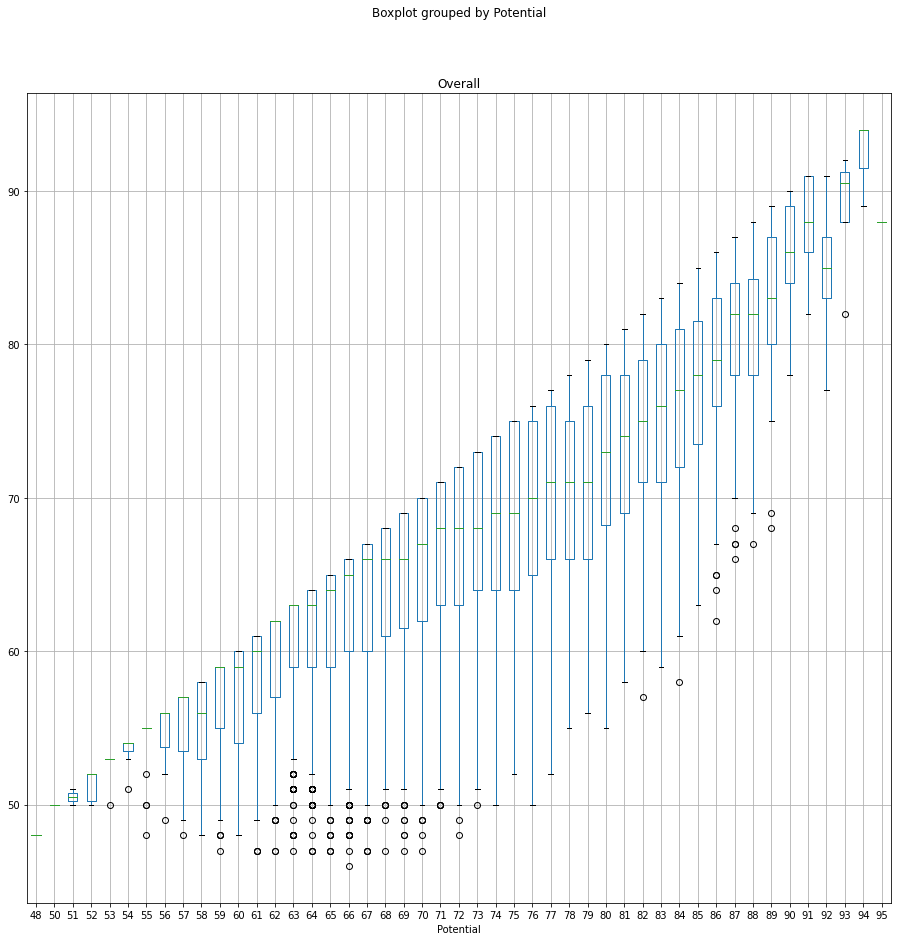

In [45]:
data.boxplot(column='Overall',by = 'Potential',figsize=(15,15))

**TIDY DATA**

We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it.

In [46]:
# Firstly I create new data from footballers data to explain melt nore easily.
data_new = data.head()    # I only take 5 rows into new data
data_new

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [47]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Age','Overall','Potential'])
melted

Name   variable  value
0            L. Messi        Age     31
1   Cristiano Ronaldo        Age     33
2           Neymar Jr        Age     26
3              De Gea        Age     27
4        K. De Bruyne        Age     27
5            L. Messi    Overall     94
6   Cristiano Ronaldo    Overall     94
7           Neymar Jr    Overall     92
8              De Gea    Overall     91
9        K. De Bruyne    Overall     91
10           L. Messi  Potential     94
11  Cristiano Ronaldo  Potential     94
12          Neymar Jr  Potential     93
13             De Gea  Potential     93
14       K. De Bruyne  Potential     92

**PIVOTING DATA**

Reverse of melting.

In [48]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable           Age  Overall  Potential
Name                                      
Cristiano Ronaldo   33       94         94
De Gea              27       91         93
K. De Bruyne        27       91         92
L. Messi            31       94         94
Neymar Jr           26       92         93

**CONCATENATING DATA**

We can concatenate two dataframe

In [49]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) 
conc_data_row

Unnamed: 0      ID                Name  Age  \
0           0  158023            L. Messi   31   
1           1   20801   Cristiano Ronaldo   33   
2           2  190871           Neymar Jr   26   
3           3  193080              De Gea   27   
4           4  192985        K. De Bruyne   27   
5       18202  238813        J. Lundstram   19   
6       18203  243165  N. Christoffersson   19   
7       18204  241638           B. Worman   16   
8       18205  246268      D. Walker-Rice   17   
9       18206  246269           G. Nugent   16   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/238813.png     England   
6  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
7  https://cdn.sofifa.org/players/4/19/241638.png     England   
8  https://cdn.sofifa.org/players/4/19/246268.png     England   
9  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   
5  https://cdn.sofifa.org/flags/14.png       47         65   
6  https://cdn.sofifa.org/flags/46.png       47         63   
7  https://cdn.sofifa.org/flags/14.png       47         67   
8  https://cdn.sofifa.org/flags/14.png       47         66   
9  https://cdn.sofifa.org/flags/14.png       46         66   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   
5      Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
6       Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
7     Cambridge United  ...      41.0    32.0           13.0           11.0   
8      Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
9      Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  
5     10.0        13.0        7.0            8.0        9.0          €143K  
6     10.0         9.0        9.0            5.0       12.0          €113K  
7      6.0         5.0       10.0            6.0       13.0          €165K  
8     14.0         6.0       14.0            8.0        9.0          €143K  
9     10.0        15.0        9.0           12.0        9.0          €165K  

[10 rows x 89 columns]

In [50]:
data1 = data['Overall'].head()
data2= data['Potential'].head()
data3= data['Age'].head()
conc_data_col = pd.concat([data1,data2,data3],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

Overall  Potential  Age
0       94         94   31
1       94         94   33
2       92         93   26
3       91         93   27
4       91         92   27

**DATA TYPES**

There are 5 basic data types: object(string),booleab, integer, float and categorical. 

We can make conversion data types like from str to categorical or from int to float 

Why is category important:

make dataframe smaller in memory

can be utilized for anlaysis especially for sklear(we will learn later)

In [51]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [52]:
# converting object(str) to categorical and int to float
data['Nationality'] = data['Nationality'].astype('category')
data['Age'] = data['Age'].astype('float')

In [53]:
#We need to focus that Age & Nationality 
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age               float64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

**MISSING DATA and TESTING WITH ASSERT**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                18207 non-null  int64   
 1   ID                        18207 non-null  int64   
 2   Name                      18207 non-null  object  
 3   Age                       18207 non-null  float64 
 4   Photo                     18207 non-null  object  
 5   Nationality               18207 non-null  category
 6   Flag                      18207 non-null  object  
 7   Overall                   18207 non-null  int64   
 8   Potential                 18207 non-null  int64   
 9   Club                      17966 non-null  object  
 10  Club Logo                 18207 non-null  object  
 11  Value                     18207 non-null  object  
 12  Wage                      18207 non-null  object  
 13  Special                   18207 non-null  int6

In [55]:
data["Skill Moves"].value_counts(dropna = False)

2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
NaN      48
Name: Skill Moves, dtype: int64

In [56]:
#Dropping NaN Values
data1 = data
data1["Skill Moves"].dropna(inplace = True)
# True means we do not assign it to new variable. Changes automatically assigned to data
# We can control with assert statement

In [57]:
assert 1 == 1 # Simple Example
#assert 1 == 2 

In [59]:
# assert data['Skill Moves'].notnull().all() # It return nothing because nan values are dropped.

In [60]:
data["Skill Moves"].fillna('empty',inplace = True)

In [61]:
assert data['Skill Moves'].notnull().all()

**4. PANDAS FOUNDATION**

VISUAL EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

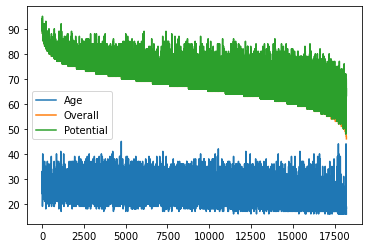

In [62]:
# Plotting all data 
data1 = data.loc[:,["Age","Overall","Potential"]]
data1.plot()
# it is confusing

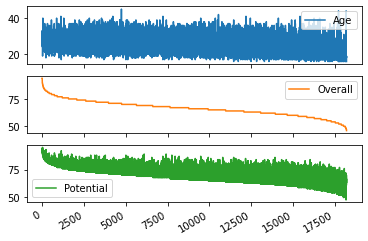

In [63]:
# subplots
data1.plot(subplots = True)
plt.show()

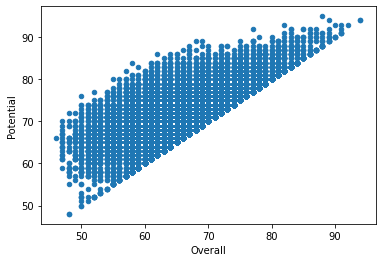

In [64]:
# scatter plot  
data1.plot(kind = "scatter",x="Overall",y = "Potential")
plt.show()

In [66]:
# hist plot  
# data1.plot(kind = "hist",y = "Overall",bins = 50,range= (40,100),normed = True)

In [67]:
# hist plot  
# data1.plot(kind = "hist",y = "Potential",bins = 50,range= (40,100),normed = True)
# 3 sigma rule valid in these graphs.

In [68]:
# # histogram subplot with non cumulative and cumulative
# fig, axes = plt.subplots(nrows=2,ncols=1)
# data1.plot(kind = "hist",y = "Overall",bins = 50,range= (40,100),normed = True,ax = axes[0])
# data1.plot(kind = "hist",y = "Potential",bins = 50,range= (40,100),normed = True,ax = axes[1],cumulative = True)
# plt.savefig('graph.png')
# plt

**STATISTICAL EXPLORATORY DATA ANALYSIS**

In [69]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot  Jersey Number  \
count  18207.000000              18159.000000  18159.000000   18147.000000   
mean    1597.809908                  1.113222      2.947299      19.546096   
std      272.586016                  0.394031      0.660456      15.947765   
min      731.000000                  1.000000      1.000000       1.000000   
25%     1457.000000                  1.000000      3.000000       8.000000   
50%     1635.000000                  1.000000      3.000000      17.000000   
75%     1787.000000                  1.000000      3.000000      26.000000   
max     2346.000000                  5.000000      5.000000      99.000000   

           Crossing  ...     Penalties     Composure       Marking  \
count  18159.000000  ...  18159.000000  18159.000000  18159.000000   
mean      49.734181  ...     48.548598     58.648274     47.281623   
std       18.364524  ...     15.704053     11.436133     19.904397   
min        5.000000  ...      5.000000      3.000000      3.000000   
25%       38.000000  ...     39.000000     51.000000     30.000000   
50%       54.000000  ...     49.000000     60.000000     53.000000   
75%       64.000000  ...     60.000000     67.000000     64.000000   
max       93.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

**SLICING DATA FRAME**
* Difference between selecting columns
* Series and data frames
* Slicing and indexing series
* Reverse slicing
* From something to end

In [70]:
print(type(data["Overall"])) # series
print(type(data[["Overall"]])) # data frames


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
#Slicing and indexing series
data.loc[4030:4040, "Overall":"Potential"]

Overall  Potential
4030       71         71
4031       71         74
4032       71         71
4033       71         71
4034       71         83
4035       71         74
4036       71         71
4037       71         71
4038       71         79
4039       71         71
4040       71         71

In [72]:
data.loc[4040:4030:-1,"Overall":"Potential"] 

Overall  Potential
4040       71         71
4039       71         71
4038       71         79
4037       71         71
4036       71         71
4035       71         74
4034       71         83
4033       71         71
4032       71         71
4031       71         74
4030       71         71

In [73]:
#From something to end
data.loc[4030:4040,"Marking":]

Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
4030     41.0            16.0           29.0      12.0        11.0       14.0   
4031     70.0            66.0           62.0      14.0        13.0        8.0   
4032     66.0            71.0           72.0      15.0        13.0       14.0   
4033     63.0            73.0           72.0      13.0        12.0       11.0   
4034     65.0            70.0           68.0      11.0        14.0        6.0   
4035     70.0            76.0           72.0      15.0         6.0       14.0   
4036     22.0            17.0           18.0      10.0        14.0       10.0   
4037     46.0            49.0           38.0      10.0        15.0       15.0   
4038     68.0            78.0           74.0       8.0         8.0        7.0   
4039     65.0            69.0           65.0       8.0         7.0       15.0   
4040     70.0            72.0           68.0       9.0         7.0       12.0   

      GKPositioning  GKReflexes Release Clause  
4030           10.0        13.0          €2.5M  
4031           14.0         8.0          €3.9M  
4032           11.0         6.0          €3.6M  
4033           16.0         8.0          €1.5M  
4034            7.0        13.0          €7.4M  
4035           10.0        13.0          €5.6M  
4036           12.0        10.0          €3.3M  
4037           12.0        15.0          €4.3M  
4038           14.0         6.0            NaN  
4039           13.0        14.0          €2.2M  
4040           14.0         6.0          €3.3M

**FILTERING DATA FRAMES**
* Creating boolean series 
* Combining filters 
* Filtering column based others

In [74]:
# Creating boolean series
boolean = data.Age >27
data[boolean]

Unnamed: 0      ID               Name   Age  \
0               0  158023           L. Messi  31.0   
1               1   20801  Cristiano Ronaldo  33.0   
6               6  177003          L. Modrić  32.0   
7               7  176580          L. Suárez  31.0   
8               8  155862       Sergio Ramos  32.0   
...           ...     ...                ...   ...   
17866       17866  232676           N. Hatta  32.0   
17988       17988  182478      Wang Xuanhong  28.0   
18043       18043  237917          A. Suzuki  31.0   
18171       18171  237746        Y. Uchimura  33.0   
18183       18183   53748      K. Pilkington  44.0   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
6      https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7      https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8      https://cdn.sofifa.org/players/4/19/155862.png       Spain   
...                                               ...         ...   
17866  https://cdn.sofifa.org/players/4/19/232676.png       Japan   
17988  https://cdn.sofifa.org/players/4/19/182478.png    China PR   
18043  https://cdn.sofifa.org/players/4/19/237917.png       Japan   
18171  https://cdn.sofifa.org/players/4/19/237746.png       Japan   
18183   https://cdn.sofifa.org/players/4/19/53748.png     England   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/52.png       94         94   
1       https://cdn.sofifa.org/flags/38.png       94         94   
6       https://cdn.sofifa.org/flags/10.png       91         91   
7       https://cdn.sofifa.org/flags/60.png       91         91   
8       https://cdn.sofifa.org/flags/45.png       91         91   
...                                     ...      ...        ...   
17866  https://cdn.sofifa.org/flags/163.png       52         52   
17988  https://cdn.sofifa.org/flags/155.png       51         51   
18043  https://cdn.sofifa.org/flags/163.png       50         50   
18171  https://cdn.sofifa.org/flags/163.png       48         48   
18183   https://cdn.sofifa.org/flags/14.png       48         48   

                             Club  ... Composure Marking StandingTackle  \
0                    FC Barcelona  ...      96.0    33.0           28.0   
1                        Juventus  ...      95.0    28.0           31.0   
6                     Real Madrid  ...      84.0    60.0           76.0   
7                    FC Barcelona  ...      85.0    62.0           45.0   
8                     Real Madrid  ...      82.0    87.0           92.0   
...                           ...  ...       ...     ...            ...   
17866                Júbilo Iwata  ...      24.0    30.0           12.0   
17988            Beijing Renhe FC  ...      38.0    62.0           51.0   
18043         Yokohama F. Marinos  ...      31.0    13.0           10.0   
18171  Hokkaido Consadole Sapporo  ...      62.0    45.0           48.0   
18183            Cambridge United  ...      56.0    15.0           15.0   

       SlidingTackle GKDiving  GKHandling  GKKicking GKPositioning GKReflexes  \
0               26.0      6.0        11.0       15.0          14.0        8.0   
1               23.0      7.0        11.0       15.0          14.0       11.0   
6               73.0     13.0         9.0        7.0          14.0        9.0   
7               38.0     27.0        25.0       31.0          33.0       37.0   
8               91.0     11.0         8.0        9.0           7.0       11.0   
...              ...      ...         ...        ...           ...        ...   
17866           13.0     54.0        48.0       45.0          52.0       54.0   
17988           46.0     10.0         7.0       16.0          12.0        8.0   
18043           14.0     49.0        48.0       54.0          52.0       54.0   
18171        

In [75]:
#Combining Filters
first_filter = data.Age > 30
second_filter = data.Strength > 90
data[first_filter & second_filter]

Unnamed: 0      ID              Name   Age  \
73             73  177509        M. Benatia  31.0   
300           300  183280           A. Rami  32.0   
303           303  179847          F. Fazio  31.0   
378           378  189362              Hulk  31.0   
1084         1084  152993        R. Civelli  34.0   
1086         1086  182179        S. De Maio  31.0   
1677         1677  171830         N. Spolli  35.0   
2215         2215  190024         Fernandão  31.0   
2351         2351  168585          R. Vlaar  33.0   
2358         2358  212107        A. Jahović  31.0   
2628         2628  139274          B. Cesar  35.0   
2846         2846  207722         Cristiano  31.0   
3288         3288  215321        J. Schunke  31.0   
4209         4209  209738        A. Cadavid  32.0   
4341         4341  164471             Xisco  32.0   
4379         4379  158849        L. Szukała  34.0   
4603         4603  213718         B. Acosta  31.0   
4673         4673  214506         R. Torres  32.0   
4887         4887  235552           E. Seka  31.0   
5135         5135  165736        D. Wheater  31.0   
5251         5251  208269        M. Budimir  32.0   
5283         5283  203159         T. Kister  31.0   
5290         5290  172696      M. Ardemagni  31.0   
5595         5595  201714           D. Böde  31.0   
5616         5616  142329        A. Tziolis  33.0   
5915         5915  219470         C. N'Doye  32.0   
6083         6083  207739       M. Havenaar  31.0   
6201         6201  137114          M. Ciani  34.0   
7012         7012  199267       S. Ruprecht  31.0   
7091         7091  199284        D. Hediger  31.0   
7144         7144  200067         Z. Diallo  31.0   
7183         7183   12940       E. Pogatetz  35.0   
7248         7248  203933         H. Lybohy  34.0   
8513         8513  161733          J. Rivas  33.0   
9501         9501  156321      A. Akinfenwa  36.0   
9510         9510  189345          D. Peitz  33.0   
9946         9946  180740  N. Topor-Stanley  33.0   
9997         9997  192528    Steven Vitória  31.0   
10356       10356   49511          F. Kippe  40.0   
10779       10779  122066          R. König  35.0   
11861       11861  176592       M. Palionis  31.0   
15179       15179  211415          M. Rhead  34.0   

                                                Photo    Nationality  \
73     https://cdn.sofifa.org/players/4/19/177509.png        Morocco   
300    https://cdn.sofifa.org/players/4/19/183280.png         France   
303    https://cdn.sofifa.org/players/4/19/179847.png      Argentina   
378    https://cdn.sofifa.org/players/4/19/189362.png         Brazil   
1084   https://cdn.sofifa.org/players/4/19/152993.png      Argentina   
1086   https://cdn.sofifa.org/players/4/19/182179.png         France   
1677   https://cdn.sofifa.org/players/4/19/171830.png      Argentina   
2215   https://cdn.sofifa.org/players/4/19/190024.png         Brazil   
2351   https://cdn.sofifa.org/players/4/19/168585.png    Netherlands   
2358   https://cdn.sofifa.org/players/4/19/212107.png  FYR Macedonia   
2628   https://cdn.sofifa.org/players/4/19/139274.png       Slovenia   
2846   https://cdn.sofifa.org/players/4/19/207722.png         Brazil   
3288   https://cdn.sofifa.org/players/4/19/215321.png      Argentina   
4209   https://cdn.sofifa.org/players/4/19/209738.png       Colombia   
4341   https://cdn.sofifa.org/players/4/19/164471.png          Spain   
4379   https://cdn.sofifa.org/players/4/19/158849.png         Poland   
4603   https://cdn.sofifa.org/players/4/19/213718.png     Costa Rica   
4673   https://cdn.sofifa.org/players/4/19/214506.png         Panama   
4887   https://cdn.sofifa.org/players/4/19/235552.png         Guinea   
5135   https://cdn.sofifa.org/players/4/19/165736.png        England   
5251   https://cdn.sofifa.org/players/4/19/208269.png        Croatia   
5283   https://cdn.sofifa.org/players/4/19/203159.png        Germany   
5290   https://cdn.sofifa.org/players/4/19/172696.png          Italy   

In [76]:
# Filtering column based others
data.Overall[data.Age < 17]

11457    64
11732    64
12496    63
12828    63
13293    62
13567    62
15363    59
15746    59
15793    59
16081    58
16254    58
16418    57
16544    57
16927    56
17091    55
17115    55
17175    55
17177    55
17200    55
17263    55
17354    54
17712    53
17743    52
17751    52
17753    52
17757    52
17776    52
17808    52
17841    52
17881    52
17887    52
17921    51
17976    51
18003    51
18018    50
18044    50
18106    50
18124    49
18162    48
18166    48
18204    47
18206    46
Name: Overall, dtype: int64

**TRANSFORMING DATA**
* Plain python functions
* Lambda function: to apply arbitrary python function to every element
* Defining column using other columns


In [77]:
# plain python functions
def div(n):
    return n/4
data.Strength.apply(div)

0        14.75
1        19.75
2        12.25
3        16.00
4        18.75
         ...  
18202    11.75
18203    16.75
18204     8.00
18205    12.00
18206    15.00
Name: Strength, Length: 18207, dtype: float64

In [78]:
#Lambda function
data.Strength.apply(lambda n : n/4)

0        14.75
1        19.75
2        12.25
3        16.00
4        18.75
         ...  
18202    11.75
18203    16.75
18204     8.00
18205    12.00
18206    15.00
Name: Strength, Length: 18207, dtype: float64

In [79]:
#Defining column using other columns
data["Potential_Overall"] = data.Potential / data.Overall
data.head()

Unnamed: 0      ID               Name   Age  \
0           0  158023           L. Messi  31.0   
1           1   20801  Cristiano Ronaldo  33.0   
2           2  190871          Neymar Jr  26.0   
3           3  193080             De Gea  27.0   
4           4  192985       K. De Bruyne  27.0   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Marking StandingTackle SlidingTackle  GKDiving  \
0         FC Barcelona  ...    33.0           28.0          26.0       6.0   
1             Juventus  ...    28.0           31.0          23.0       7.0   
2  Paris Saint-Germain  ...    27.0           24.0          33.0       9.0   
3    Manchester United  ...    15.0           21.0          13.0      90.0   
4      Manchester City  ...    68.0           58.0          51.0      15.0   

  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  \
0       11.0       15.0           14.0        8.0        €226.5M   
1       11.0       15.0           14.0       11.0        €127.1M   
2        9.0       15.0           15.0       11.0        €228.1M   
3       85.0       87.0           88.0       94.0        €138.6M   
4       13.0        5.0           10.0       13.0        €196.4M   

  Potential_Overall  
0          1.000000  
1          1.000000  
2          1.010870  
3          1.021978  
4          1.010989  

[5 rows x 90 columns]

**INDEX OBJECTS AND LABELED DATA**
* index: sequence of label

In [80]:
#our index name is this
print(data.index.name)

data.index.name = "index_name"
data.head()

None


Unnamed: 0      ID               Name   Age  \
index_name                                                
0                    0  158023           L. Messi  31.0   
1                    1   20801  Cristiano Ronaldo  33.0   
2                    2  190871          Neymar Jr  26.0   
3                    3  193080             De Gea  27.0   
4                    4  192985       K. De Bruyne  27.0   

                                                     Photo Nationality  \
index_name                                                               
0           https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1            https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2           https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3           https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4           https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                           Flag  Overall  Potential  \
index_name                                                            
0           https://cdn.sofifa.org/flags/52.png       94         94   
1           https://cdn.sofifa.org/flags/38.png       94         94   
2           https://cdn.sofifa.org/flags/54.png       92         93   
3           https://cdn.sofifa.org/flags/45.png       91         93   
4            https://cdn.sofifa.org/flags/7.png       91         92   

                           Club  ... Marking StandingTackle SlidingTackle  \
index_name                       ...                                        
0                  FC Barcelona  ...    33.0           28.0          26.0   
1                      Juventus  ...    28.0           31.0          23.0   
2           Paris Saint-Germain  ...    27.0           24.0          33.0   
3             Manchester United  ...    15.0           21.0          13.0   
4               Manchester City  ...    68.0           58.0          51.0   

            GKDiving GKHandling  GKKicking  GKPositioning GKReflexes  \
index_name                                                             
0                6.0       11.0       15.0           14.0        8.0   
1                7.0       11.0       15.0           14.0       11.0   
2                9.0        9.0       15.0           15.0       11.0   
3               90.0       85.0       87.0           88.0       94.0   
4               15.0       13.0        5.0           10.0       13.0   

           Release Clause Potential_Overall  
index_name                                   
0                 €226.5M          1.000000  
1                 €127.1M          1.000000  
2                 €228.1M          1.010870  
3                 €138.6M          1.021978  
4                 €196.4M          1.010989  

[5 rows x 90 columns]

**HIERARCHICAL INDEXING**
* Setting indexing

In [81]:
data.head()

Unnamed: 0      ID               Name   Age  \
index_name                                                
0                    0  158023           L. Messi  31.0   
1                    1   20801  Cristiano Ronaldo  33.0   
2                    2  190871          Neymar Jr  26.0   
3                    3  193080             De Gea  27.0   
4                    4  192985       K. De Bruyne  27.0   

                                                     Photo Nationality  \
index_name                                                               
0           https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1            https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2           https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3           https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4           https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                           Flag  Overall  Potential  \
index_name                                                            
0           https://cdn.sofifa.org/flags/52.png       94         94   
1           https://cdn.sofifa.org/flags/38.png       94         94   
2           https://cdn.sofifa.org/flags/54.png       92         93   
3           https://cdn.sofifa.org/flags/45.png       91         93   
4            https://cdn.sofifa.org/flags/7.png       91         92   

                           Club  ... Marking StandingTackle SlidingTackle  \
index_name                       ...                                        
0                  FC Barcelona  ...    33.0           28.0          26.0   
1                      Juventus  ...    28.0           31.0          23.0   
2           Paris Saint-Germain  ...    27.0           24.0          33.0   
3             Manchester United  ...    15.0           21.0          13.0   
4               Manchester City  ...    68.0           58.0          51.0   

            GKDiving GKHandling  GKKicking  GKPositioning GKReflexes  \
index_name                                                             
0                6.0       11.0       15.0           14.0        8.0   
1                7.0       11.0       15.0           14.0       11.0   
2                9.0        9.0       15.0           15.0       11.0   
3               90.0       85.0       87.0           88.0       94.0   
4               15.0       13.0        5.0           10.0       13.0   

           Release Clause Potential_Overall  
index_name                                   
0                 €226.5M          1.000000  
1                 €127.1M          1.000000  
2                 €228.1M          1.010870  
3                 €138.6M          1.021978  
4                 €196.4M          1.010989  

[5 rows x 90 columns]

In [82]:
# Setting index : overall is outer potential is inner index
data1 = data.set_index(["Overall","Potential"])
data1.head(100)

Unnamed: 0      ID               Name   Age  \
Overall Potential                                                
94      94                  0  158023           L. Messi  31.0   
        94                  1   20801  Cristiano Ronaldo  33.0   
92      93                  2  190871          Neymar Jr  26.0   
91      93                  3  193080             De Gea  27.0   
        92                  4  192985       K. De Bruyne  27.0   
...                       ...     ...                ...   ...   
85      85                 95  183907         J. Boateng  29.0   
        85                 96  181872           A. Vidal  31.0   
        85                 97  181458         I. Perišić  29.0   
        85                 98  180930           E. Džeko  32.0   
        85                 99  179846         S. Khedira  31.0   

                                                            Photo  \
Overall Potential                                                   
94      94         https://cdn.sofifa.org/players/4/19/158023.png   
        94          https://cdn.sofifa.org/players/4/19/20801.png   
92      93         https://cdn.sofifa.org/players/4/19/190871.png   
91      93         https://cdn.sofifa.org/players/4/19/193080.png   
        92         https://cdn.sofifa.org/players/4/19/192985.png   
...                                                           ...   
85      85         https://cdn.sofifa.org/players/4/19/183907.png   
        85         https://cdn.sofifa.org/players/4/19/181872.png   
        85         https://cdn.sofifa.org/players/4/19/181458.png   
        85         https://cdn.sofifa.org/players/4/19/180930.png   
        85         https://cdn.sofifa.org/players/4/19/179846.png   

                          Nationality                                 Flag  \
Overall Potential                                                            
94      94                  Argentina  https://cdn.sofifa.org/flags/52.png   
        94                   Portugal  https://cdn.sofifa.org/flags/38.png   
92      93                     Brazil  https://cdn.sofifa.org/flags/54.png   
91      93                      Spain  https://cdn.sofifa.org/flags/45.png   
        92                    Belgium   https://cdn.sofifa.org/flags/7.png   
...                               ...                                  ...   
85      85                    Germany  https://cdn.sofifa.org/flags/21.png   
        85                      Chile  https://cdn.sofifa.org/flags/55.png   
        85                    Croatia  https://cdn.sofifa.org/flags/10.png   
        85         Bosnia Herzegovina   https://cdn.sofifa.org/flags/8.png   
        85                    Germany  https://cdn.sofifa.org/flags/21.png   

                                  Club  \
Overall Potential                        
94      94                FC Barcelona   
        94                    Juventus   
92      93         Paris Saint-Germain   
91      93           Manchester United   
        92             Manchester City   
...                                ...   
85      85           FC Bayern München   
        85                FC Barcelona   
        85                       Inter   
        85                        Roma   
        85                    Juventus   

                                                      Club Logo    Value  ...  \
Overall Potential                                                         ...   
94      94         https://cdn.sofifa.org/teams/2/light/241.png  €110.5M  ...   
        94          https://cdn.sofifa.org/teams/2/light/45.png     €77M  ...   
92      93          https://cdn.sofifa.org/teams/2/light/73.png  €118.5M  ...   
91      93          https://cdn.sofifa.org/teams/2/light/11.png     €72M  ...   
        92          https://cdn.sofifa.org/teams/2/light/10.png    €102M  ...   
...                                                         ...      ...  ...   
85      85          https://cdn.sofifa.org/teams/2/l

**PIVOTING DATA FRAMES**
* pivoting: reshape tool

In [83]:
dic = {"treatment":["A","A","C","C"],"gender":["F","M","M","F"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

treatment gender  response  age
0         A      F        10   15
1         A      M        45    4
2         C      M         5   72
3         C      F         9   65

In [84]:
#pivoting
df.pivot(index="treatment",columns = "gender",values="response")

gender      F   M
treatment        
A          10  45
C           9   5

**STACKING and UNSTACKING DATAFRAME**
* deal with multi label indexes
* level: position of unstacked index
* swaplevel: change inner and outer level index position

In [85]:
df1 = df.set_index(["treatment","gender"])
df1


response  age
treatment gender               
A         F             10   15
          M             45    4
C         M              5   72
          F              9   65

In [86]:
df1.unstack(level=0)
# level = index 

response    age    
treatment        A  C   A   C
gender                       
F               10  9  15  65
M               45  5   4  72

In [87]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
C                9   5  65  72

In [88]:
# changing inner & outer level index position
df2 = df1.swaplevel(0,1)
df2

response  age
gender treatment               
F      A                10   15
M      A                45    4
       C                 5   72
F      C                 9   65

**MELTING DATA FRAMES**
* Reverse of pivoting

In [89]:
df

treatment gender  response  age
0         A      F        10   15
1         A      M        45    4
2         C      M         5   72
3         C      F         9   65

In [90]:
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

treatment  variable  value
0         A       age     15
1         A       age      4
2         C       age     72
3         C       age     65
4         A  response     10
5         A  response     45
6         C  response      5
7         C  response      9

**CATEGORICALS AND GROUPBY**

In [91]:
df

treatment gender  response  age
0         A      F        10   15
1         A      M        45    4
2         C      M         5   72
3         C      F         9   65

In [92]:
df.groupby("treatment").mean() # aggreation / reduction method
# also sum, std, max, or min we can use it.

response   age
treatment                
A              27.5   9.5
C               7.0  68.5

In [93]:
df.groupby("treatment").age.max()

treatment
A    15
C    72
Name: age, dtype: int64

In [94]:
df.groupby("treatment")[["age","response"]].min()

age  response
treatment               
A            4        10
C           65         5

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   treatment  4 non-null      object
 1   gender     4 non-null      object
 2   response   4 non-null      int64 
 3   age        4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes
